# Week 6 - Datascience Analysis

Analysis of the European soccer matches and the odds provided by different agencies.

In [1]:
# Import Python Libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Create to the Soccer Database connection.
cnx = sqlite3.connect('../data/european_soccer/database.sqlite')

# Retrive the Soccer Match & Team data from the DB
match_df = pd.read_sql_query("SELECT * FROM Match", cnx)
team_df = pd.read_sql_query("SELECT * FROM Team", cnx)
team_att_df = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

### Remove the soccer matches that don't have a complete set of odds across all betting agencies

In [116]:
# Columns that contain the betting odds
cols = match_df.columns[match_df.columns.slice_indexer('B365H','BSA')]

# Drop the matches that don't have a complete set of data
match_df = match_df.dropna(subset=cols)

### Display the average odds for each of the agencies

In [117]:
# Workout the average for each Home / Draw / Away odds for each agency and plot

### Calculate the returns a gambler would get starting with a 10k bankroll and betting \$1 dollar each match on a win/loss/draw with each of the agencies

In [149]:
# Setup bankroll for each betting agency with $10k
bankroll_dict = dict()
bankroll_list = []

for agency in cols:
    bankroll_dict[agency] = 10000

bankroll_list.append(bankroll_dict.copy())    

# Loop over the match results
for index, row in match_df.iterrows():
        
    # Place the $1 for the bet and update the match ID
    for key, value in bankroll_dict.items():
        bankroll_dict[key] = bankroll_dict[key] - 1
    
    # Determine the result - Home win, Draw, Home loss
    if row['home_team_goal'] > row['away_team_goal']:
        
        # Home team win so calulate the return for home bets
        for key, value in bankroll_dict.items():
            if key.endswith('H'):
                bankroll_dict[key] = bankroll_dict[key] + (1 * row[key])
        
    elif row['home_team_goal'] < row['away_team_goal']:
        
        # Away team win so calulate the return for away bets
        for key, value in bankroll_dict.items():
            if key.endswith('A'):
                bankroll_dict[key] = bankroll_dict[key] + (1 * row[key])
        
    else:
        # Draw so calulate the return for draw bets
        for key, value in bankroll_dict.items():
            if key.endswith('D'):
                bankroll_dict[key] = bankroll_dict[key] + (1 * row[key])
    
    bankroll_list.append(bankroll_dict.copy())
    
bankroll_df = pd.DataFrame(bankroll_list)


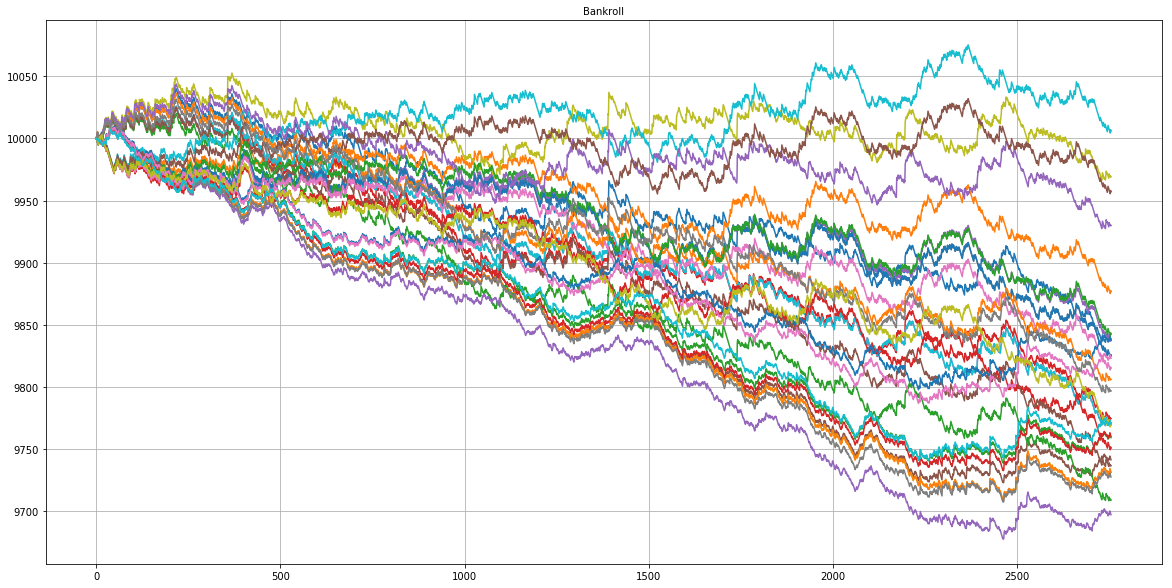

In [164]:
# Display the result in a line chart comparing the different betting agencies
fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Bankroll',fontsize=10)

plt.plot(bankroll_df.index, bankroll_df.values)
plt.show()

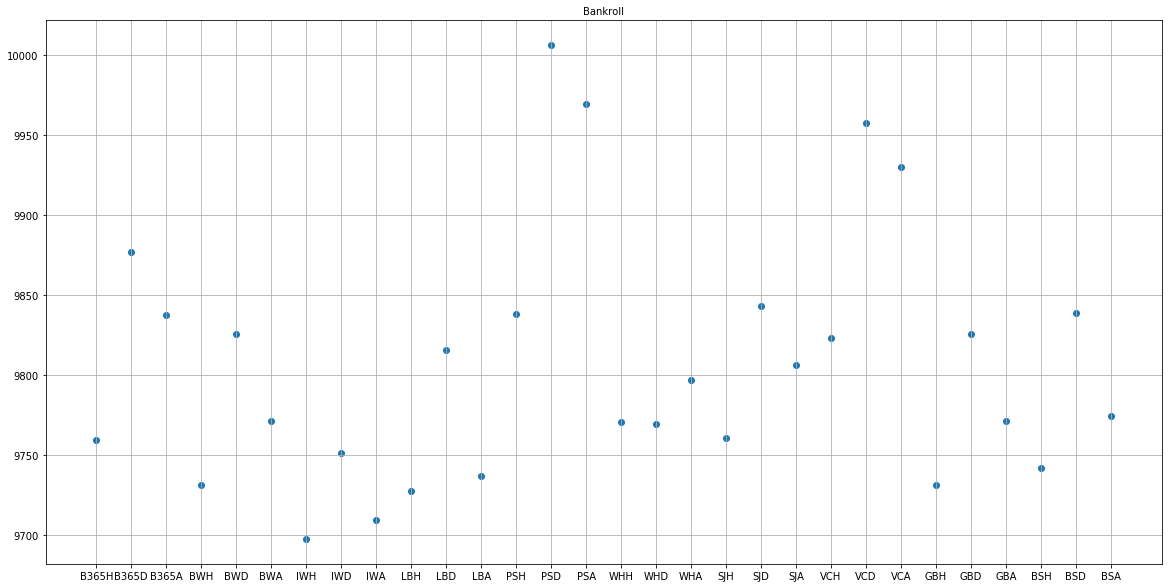

In [148]:
# Compare the ROI of betting on the home team vs draw vs away team
fig, axis = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(20)
axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Bankroll',fontsize=10)

X = list(bankroll_dict.keys())
Y = list(bankroll_dict.values())

axis.scatter(X, Y)
plt.show()

In [173]:
# Is it more profitable to bet on the home team, draw or away team

# Average bankroll after betting on home team
tmp = [ v for k,v in bankroll_dict.items() if k.endswith('H')]
avg = sum(tmp) / len(tmp)
print(avg)

# Average bankroll after betting on a draw
tmp = [ v for k,v in bankroll_dict.items() if k.endswith('D')]
avg = sum(tmp) / len(tmp)
print(avg)

# Average bankroll after betting on away team
tmp = [ v for k,v in bankroll_dict.items() if k.endswith('A')]
avg = sum(tmp) / len(tmp)
print(avg)

9757.968100000018
9850.679999999986
9810.158199999996
